In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from tqdm import tqdm

In [2]:
# downloading training and testing datasets
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)

testing_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

In [3]:
batch_size = 64

# create data loaders
train_dataloader = DataLoader(training_data, batch_size = batch_size)
test_dataloader = DataLoader(testing_data, batch_size = batch_size)

for x, y in test_dataloader:
    print(f'Shape of x [N, C, H, W]: {x.shape}')
    print(f'Shape of y: {y.shape} {y.dtype}')
    break

Shape of x [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


# Model Creation

In [4]:
# device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
# print(f'Using {device} device')

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.ReLU(),
            nn.Linear(1024, 2048),
            nn.ReLU(),
            nn.Linear(2048, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
# Instantiate the model and move it to the device
model = NeuralNetwork()
print(model)


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=2048, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2048, out_features=10, bias=True)
  )
)


In [5]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

# Training Loop

In [6]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train() # set the model to training mode

    for batch, (x, y) in enumerate(dataloader):
        # forward pass
        pred = model(x)
        loss = loss_fn(pred, y)

        # backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(x)
            print(f'loss: {loss:>7f}  [{current:>5d}/{size:>5d}]')

# Evaluation on test data

In [ ]:
def test(dataloader, model, loss_fn):
    losses = [] # to store loss values
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval() # set the model to evaluation mode
    test_loss, correct = 0, 0

    with torch.no_grad():
        for x, y in dataloader:
            pred = model(x)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    # losses.append(test_loss / num_batches) # append average loss for the batch
    
    test_loss /= num_batches
    correct /= size
    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')
    # return losses

Epoch 1
-------------------------------


loss: 2.305411  [   64/60000]
loss: 2.282089  [ 6464/60000]
loss: 2.249266  [12864/60000]
loss: 2.244639  [19264/60000]
loss: 2.213545  [25664/60000]
loss: 2.161319  [32064/60000]
loss: 2.171369  [38464/60000]
loss: 2.113429  [44864/60000]
loss: 2.122021  [51264/60000]
loss: 2.057087  [57664/60000]
Test Error: 
 Accuracy: 52.9%, Avg loss: 2.051857 



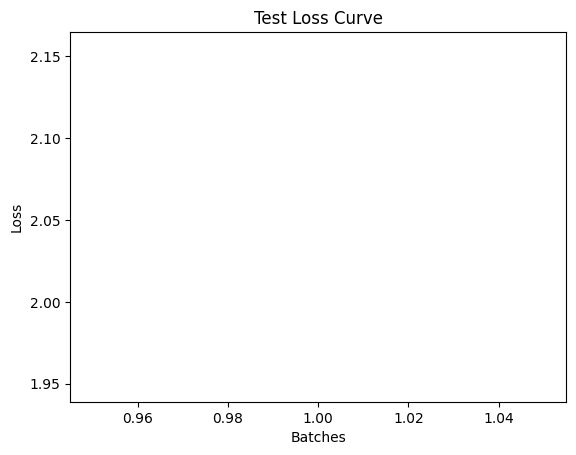

Epoch 2
-------------------------------
loss: 2.072465  [   64/60000]
loss: 2.049264  [ 6464/60000]
loss: 1.953665  [12864/60000]
loss: 1.987934  [19264/60000]
loss: 1.882292  [25664/60000]
loss: 1.813151  [32064/60000]
loss: 1.833068  [38464/60000]
loss: 1.724482  [44864/60000]
loss: 1.747914  [51264/60000]
loss: 1.633020  [57664/60000]
Test Error: 
 Accuracy: 61.1%, Avg loss: 1.641803 



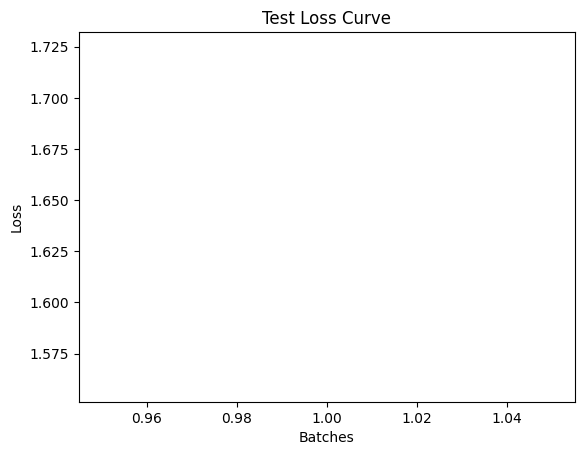

Epoch 3
-------------------------------
loss: 1.692848  [   64/60000]
loss: 1.656154  [ 6464/60000]
loss: 1.500709  [12864/60000]
loss: 1.576286  [19264/60000]
loss: 1.423996  [25664/60000]
loss: 1.405304  [32064/60000]
loss: 1.412555  [38464/60000]
loss: 1.322998  [44864/60000]
loss: 1.362317  [51264/60000]
loss: 1.250374  [57664/60000]
Test Error: 
 Accuracy: 64.1%, Avg loss: 1.276846 



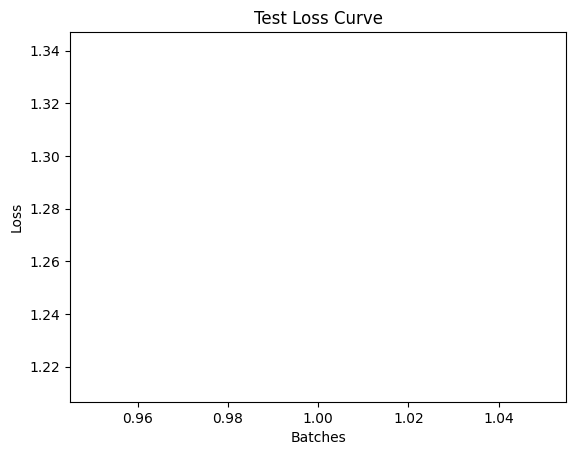

Epoch 4
-------------------------------
loss: 1.345289  [   64/60000]
loss: 1.331562  [ 6464/60000]
loss: 1.154317  [12864/60000]
loss: 1.274775  [19264/60000]
loss: 1.123148  [25664/60000]
loss: 1.145209  [32064/60000]
loss: 1.160367  [38464/60000]
loss: 1.091409  [44864/60000]
loss: 1.137489  [51264/60000]
loss: 1.050610  [57664/60000]
Test Error: 
 Accuracy: 65.7%, Avg loss: 1.070986 



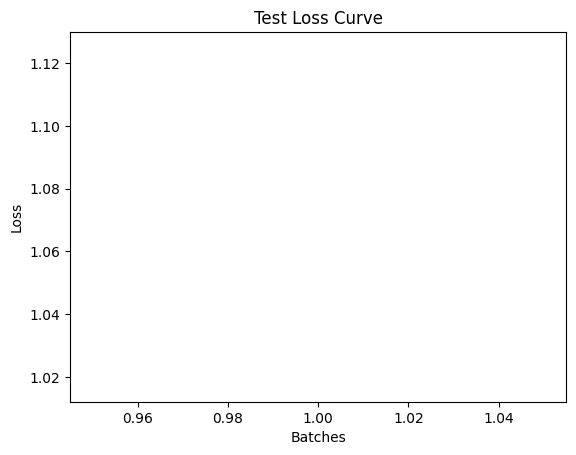

Epoch 5
-------------------------------
loss: 1.130764  [   64/60000]
loss: 1.146917  [ 6464/60000]
loss: 0.950156  [12864/60000]
loss: 1.106853  [19264/60000]
loss: 0.958653  [25664/60000]
loss: 0.989421  [32064/60000]
loss: 1.023667  [38464/60000]
loss: 0.961625  [44864/60000]
loss: 1.007677  [51264/60000]
loss: 0.940540  [57664/60000]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.952122 



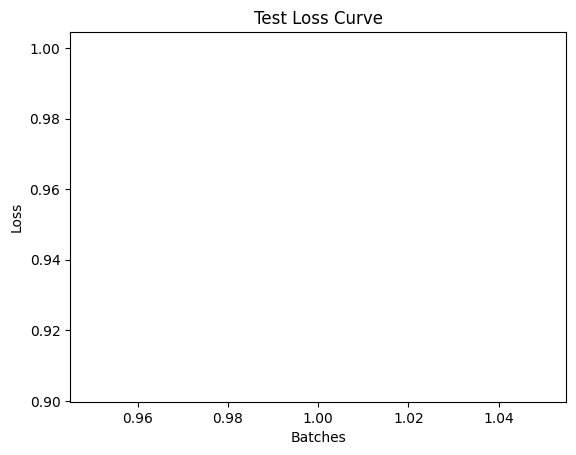

Epoch 6
-------------------------------
loss: 0.995077  [   64/60000]
loss: 1.038866  [ 6464/60000]
loss: 0.823370  [12864/60000]
loss: 1.005455  [19264/60000]
loss: 0.864081  [25664/60000]
loss: 0.888770  [32064/60000]
loss: 0.941309  [38464/60000]
loss: 0.884420  [44864/60000]
loss: 0.924974  [51264/60000]
loss: 0.872002  [57664/60000]
Test Error: 
 Accuracy: 68.6%, Avg loss: 0.876580 



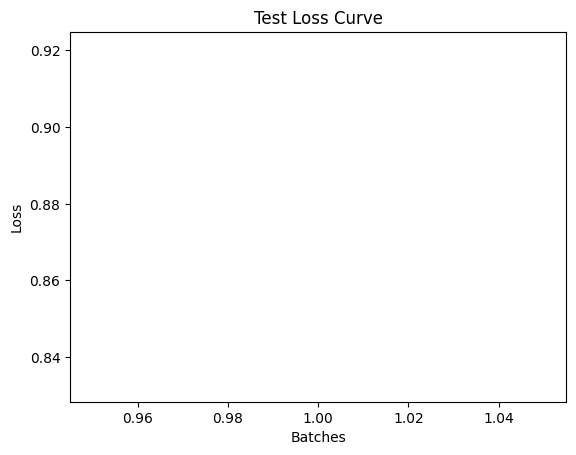

Epoch 7
-------------------------------
loss: 0.901502  [   64/60000]
loss: 0.968098  [ 6464/60000]
loss: 0.737959  [12864/60000]
loss: 0.938044  [19264/60000]
loss: 0.804137  [25664/60000]
loss: 0.819387  [32064/60000]
loss: 0.885527  [38464/60000]
loss: 0.835561  [44864/60000]
loss: 0.868129  [51264/60000]
loss: 0.824254  [57664/60000]
Test Error: 
 Accuracy: 70.2%, Avg loss: 0.824119 



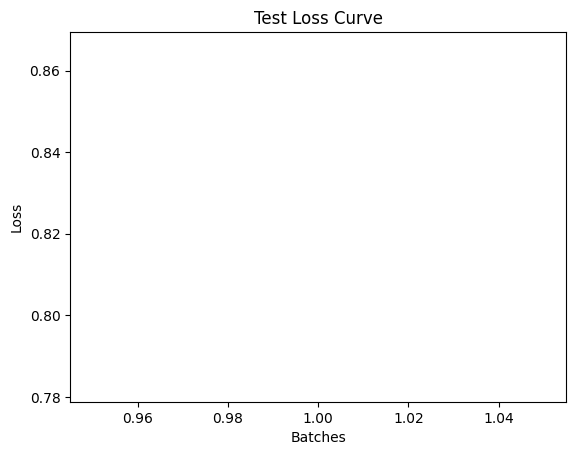

Epoch 8
-------------------------------
loss: 0.832214  [   64/60000]
loss: 0.916061  [ 6464/60000]
loss: 0.676572  [12864/60000]
loss: 0.889824  [19264/60000]
loss: 0.762631  [25664/60000]
loss: 0.769295  [32064/60000]
loss: 0.843589  [38464/60000]
loss: 0.802564  [44864/60000]
loss: 0.826680  [51264/60000]
loss: 0.787774  [57664/60000]
Test Error: 
 Accuracy: 71.6%, Avg loss: 0.784792 



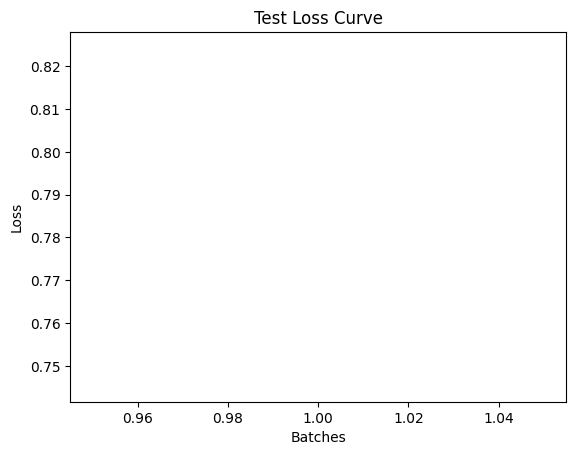

Done!


In [8]:
epochs = 8
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")
 
# # plot loss curve
# import matplotlib.pyplot as plt
# loss_values = test(test_dataloader, model, loss_fn)

In [9]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = testing_data[0][0], testing_data[0][1]
with torch.no_grad():
    # x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"
